# Getting Started with Python Control Systems Library

The [Python Control Systems Library](https://github.com/python-control/python-control) provides basic tools for the analysis and design of linear feedback control systems. The library provides tools to specify transfer function and state space models, manipulate models using block diagram algebra, stability analysis, and perform time and frequency domain simulation.

The purpose of these notes is to provide a quick start with the Python Control Systems Library. Consult the [Python Control Systems Documentation](http://python-control.readthedocs.io/en/latest/) for more details.

## Installation

The [Python Control Systems Library](https://github.com/python-control/python-control) is not, unfortunately, a standard part of most standard Python distributions. On most systems, the following commands will perform the required one-time installation of the necessary software.

In [4]:
!pip install slycot
!pip install control

## Library Usage

The control systems library is designed to work with a simplified syntax where libraries are imported without the standard prefixes.  

In [28]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

## Demonstration

### Step Response of Transfer Functions

The cell demonstrates the use of two functions in the control systems library, `tf` and `step`. Suppose a signal $y(s)$ is related to an input $u(s)$ by the formula

$$y(s) = \underbrace{\frac{4.3}{3.2s + 1}}_{G(s)} u(s)$$

The transfer function

$$G(s) = \frac{4.3}{3.2 s + 1}$$

is represented in the control system libary using `tf`. 

In [29]:
G = control.tf([4.3],[3.2, 1])
print(G)


   4.3
---------
3.2 s + 1



The step response is created and plotted as

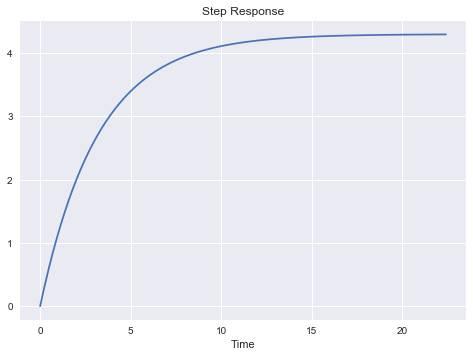

In [30]:
y,t = control.step(G)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Step Response')

Let's consider a pair of transfer functions in series

$$u(s) \stackrel{}{\longrightarrow} \boxed{\\ G(s) = \frac{4.3}{3.2s + 2} \\ }
\stackrel{v(s)}{\longrightarrow} 
\boxed{} 
\longrightarrow y(s)$$

A second order transfer function with time delay

$$G(s) = \frac{3e^{-2s}}{4s^2 + s + 1}$$

This transfer function has two parts. The first part is the ratio of two polynomials in the Laplace variable $s$.

In [4]:
R = tf([3.],[4.,1.,1.])
print(R)


      3
-------------
4 s^2 + s + 1



The second part of the transfer function is a time delay $e^{-2s}$. Unfortunately, the control systems library doesn't work directly with time delays. Instead, the procedure is to create a Pade approximation.

In [5]:
# pade approximation of the time delay
num,den = pade(2,5)
D = tf(num,den)
D


-s^5 + 15 s^4 - 105 s^3 + 420 s^2 - 945 s + 945
-----------------------------------------------
s^5 + 15 s^4 + 105 s^3 + 420 s^2 + 945 s + 945

Putting these together


In [7]:
G = R*D
print(G)


          -3 s^5 + 45 s^4 - 315 s^3 + 1260 s^2 - 2835 s + 2835
------------------------------------------------------------------------
4 s^7 + 61 s^6 + 436 s^5 + 1800 s^4 + 4305 s^3 + 5145 s^2 + 1890 s + 945



In [29]:
R==D

False

[-8, 8, -3, 3]

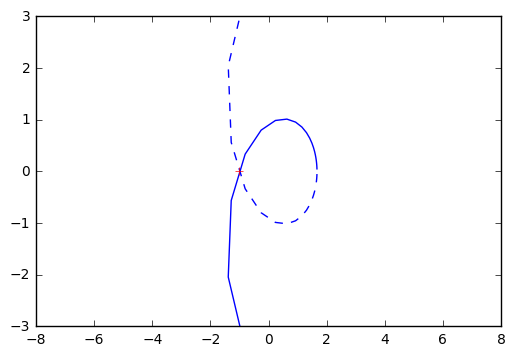

In [4]:
control.nyquist_plot(1.0/(0.2*G));
plt.axis([-8,8,-3,3])

In [6]:
print "Steady State Gain = ", control.dcgain(G)

 Steady State Gain =  [[ 3.]]


In [172]:
(gm,pm,sm,wg,wp,ws) = control.stability_margins(G)

print 1./sm, gm

0.419981426016 0.207910394705


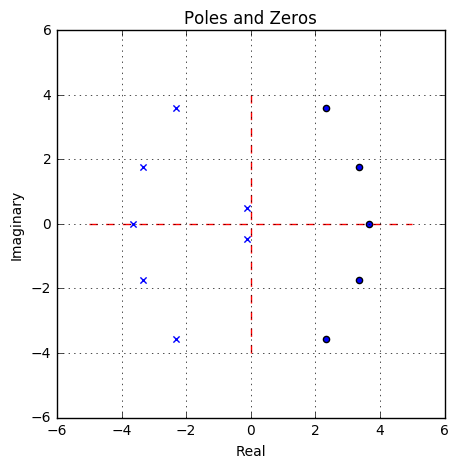

In [147]:
poles = control.pole(G)
zeros = control.zero(G)

fig = plt.figure(figsize=(5,5))
plt.scatter(poles.real,poles.imag,marker='x')
plt.scatter(zeros.real,zeros.imag,marker='o')

plt.axis('equal')
plt.plot(plt.xlim(),(0,0),'r--')
plt.plot((0,0),plt.ylim(),'r--')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Poles and Zeros')
plt.grid()

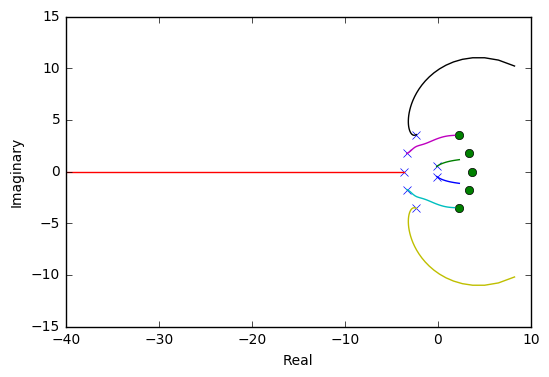

In [152]:
control.root_locus(G);

### Step Response

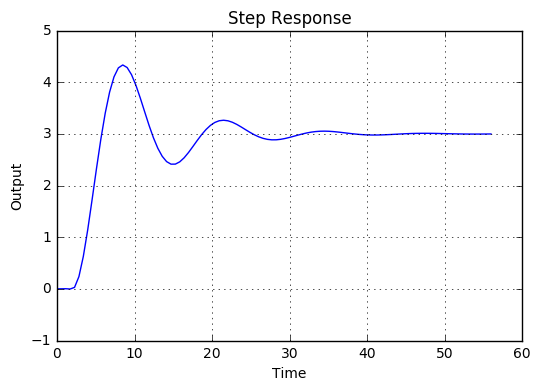

In [119]:
T,yout = control.step_response(g)

plt.plot(T,yout)
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid()

### Bode Plot

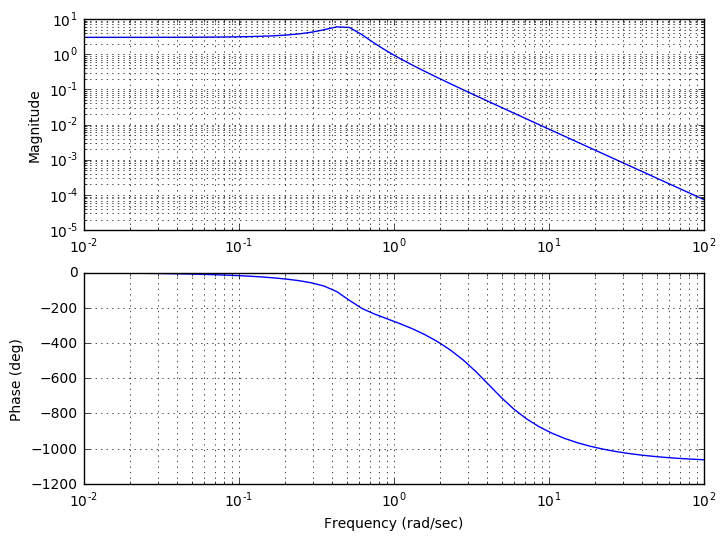

In [15]:
plt.figure(figsize=(8,6))
mag,phase,omega = control.bode_plot(G)
fig = plt.gcf()

In [182]:
omega

array([  1.00000000e-02,   1.20679264e-02,   1.45634848e-02,
         1.75751062e-02,   2.12095089e-02,   2.55954792e-02,
         3.08884360e-02,   3.72759372e-02,   4.49843267e-02,
         5.42867544e-02,   6.55128557e-02,   7.90604321e-02,
         9.54095476e-02,   1.15139540e-01,   1.38949549e-01,
         1.67683294e-01,   2.02358965e-01,   2.44205309e-01,
         2.94705170e-01,   3.55648031e-01,   4.29193426e-01,
         5.17947468e-01,   6.25055193e-01,   7.54312006e-01,
         9.10298178e-01,   1.09854114e+00,   1.32571137e+00,
         1.59985872e+00,   1.93069773e+00,   2.32995181e+00,
         2.81176870e+00,   3.39322177e+00,   4.09491506e+00,
         4.94171336e+00,   5.96362332e+00,   7.19685673e+00,
         8.68511374e+00,   1.04811313e+01,   1.26485522e+01,
         1.52641797e+01,   1.84206997e+01,   2.22299648e+01,
         2.68269580e+01,   3.23745754e+01,   3.90693994e+01,
         4.71486636e+01,   5.68986603e+01,   6.86648845e+01,
         8.28642773e+01,

In [153]:
gm,pm, Wcg, Wcp = control.margin(g)
print "Gain Margin = ", gm
print "Phase Margin = ", pm
print "Gain Cross-over Frequency = ", Wcg
print "Phase Cross-over Frequency = ", Wcp

Gain Margin =  0.207910394705
Phase Margin =  266.838160904
Gain Cross-over Frequency =  0.979244583924
Phase Cross-over Frequency =  0.563088683802


In [38]:
P = control.tf([1.],[1.])
I = control.tf([1.],[1.,0.])
D = control.tf([1.,0.],[1.])


-s^5 + 60 s^4 - 1680 s^3 + 2.688e+04 s^2 - 2.419e+05 s + 9.677e+05
------------------------------------------------------------------
 s^5 + 60 s^4 + 1680 s^3 + 2.688e+04 s^2 + 2.419e+05 s + 9.677e+05

In [14]:
g + k


     2 s^3 + 3 s^2 + 7 s + 2
---------------------------------
6 s^4 + 11 s^3 + 15 s^2 + 7 s + 1

In [14]:
control?